In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


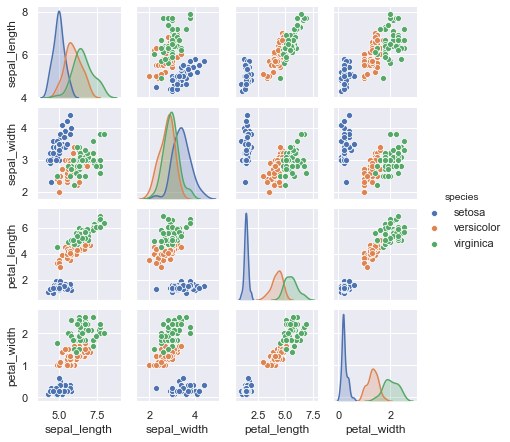

In [2]:
%matplotlib inline
import seaborn as sns;sns.set()
sns.pairplot(iris,hue='species',height=1.5)

In [3]:
X_iris = iris.drop('species',axis = 1)
X_iris.shape

(150, 4)

In [4]:
y_iris = iris['species']
y_iris.shape

(150,)

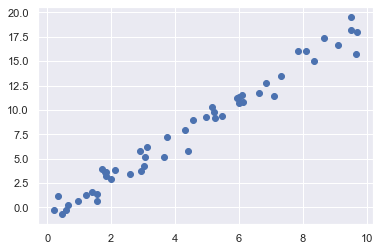

In [5]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x,y)

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
X =x[:,np.newaxis]
X.shape

(50, 1)

In [9]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
model.coef_

array([1.9776566])

In [11]:
model.intercept_

-0.9033107255311146

In [12]:
xfit = np.linspace(-1,11)

In [13]:
Xfit = xfit[:,np.newaxis]
yfit = model.predict(Xfit)

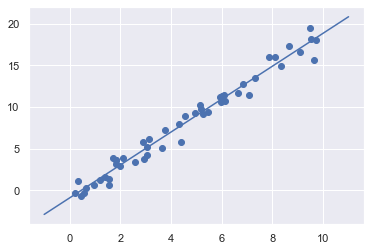

In [14]:
plt.scatter(x,y)
plt.plot(xfit,yfit)

In [15]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X_iris,y_iris,random_state=1)

In [16]:
from sklearn.naive_bayes import GaussianNB # 1.选择模型类
model = GaussianNB()                       # 2.初始化模型
model.fit(Xtrain,ytrain)                   # 3.用模型拟合数据
y_model = model.predict(Xtest)             # 4.对新数据进行预测

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,y_model)

0.9736842105263158

In [18]:
from sklearn.decomposition import PCA   # 1.选择模型类
model = PCA(n_components=2)             # 2.设置超参数，初始化模型
model.fit(X_iris)                       # 3.拟合数据，注意这里不用y变量
X_2D = model.transform(X_iris)          # 4.将数据转化为二维

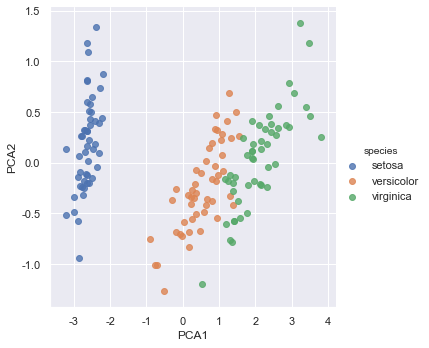

In [19]:
iris['PCA1'] = X_2D[:,0]
iris['PCA2'] = X_2D[:,1]
sns.lmplot("PCA1", "PCA2", hue = 'species', data = iris, fit_reg = False)

In [20]:
from sklearn.mixture import GaussianMixture                     # 1.选择模型类
model = GaussianMixture(n_components=3, covariance_type='full') # 2.设置超参数，初始化模型
model.fit(X_iris)                                               # 3.拟合参数，注意不需要y变量
y_gmm = model.predict(X_iris)                                   # 4.确定簇标签

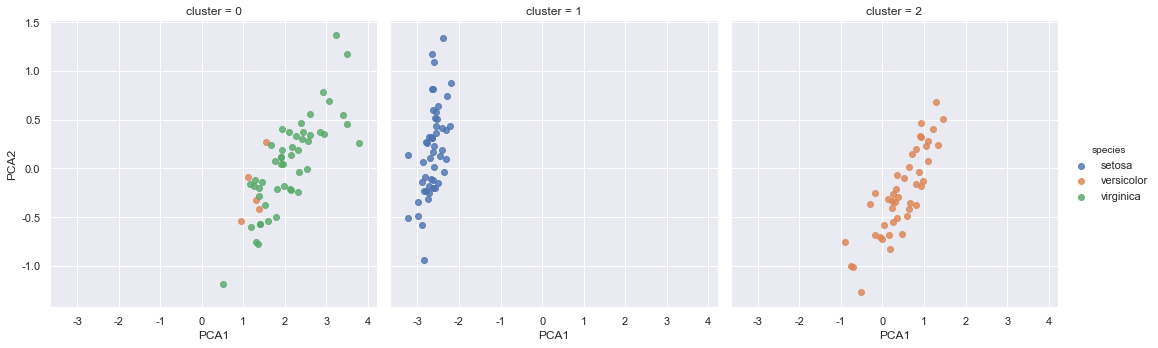

In [21]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1","PCA2",data=iris,hue='species',col='cluster',fit_reg = False)